# Heart Attack Analisis and Prediction
Solo en Estados Unidos, cada 33 segundos muere una persona a causa de problemas cardiovasulares, y 1 de cada 5 ataques al corazón ocurre de manera silenciosa, es decir, el daño está hecho sin que la persona alcance a enterarse. 
El Centro de Control y Prevención de Enfermedades Estadounidense explica que existe una gran cantidad de condiciones de salud que pueden representar factores de riesgo relacionados a problemas cardiovasculares. Entre ellos están, desde los niveles de presión y colesterol, hasta la edad y estilo de vida de las personas.
Este trabajo tiene como proposito entender, por medio de un conjunto de datos público, cuáles son posibles factores de riesgo, y construir un modelo que ayude a predecir el riesgo o no de un paciente de tener una Enfermedad Cardiovacular.

### Loading data
En primer lugar importamos las librerias que utilizaremos para el tratamiento de los datos, y los datos como tal.

Además se configura la manera en que se mostrarán los datos en el notebook.

In [1]:
!pip install missingno


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import missingno

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas


In [4]:
original_df = pd.read_csv('heart.csv')
df_raw = original_df.copy(deep=True)

In [5]:
df_raw

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
%matplotlib inline

sns.set(style = "whitegrid", context = "notebook")
plt.rcParams["figure.figsize"] = (15, 10)

# Se configura la paleta de colores para la clasificación
heartAttackPalette = {
    1 : "#83192D",
    0 : "#6D8A90"
}

## Entendiendo los datos (EDA)
Para no dejar nada en el camino es fundamental comprender nuestros datos, a continuación llevaremos a cabo un **Análisis Exploratorio de datos**, comprendiendo cómo se comportan las observaciones y qué información nos pueden entregar.

### Tamaño y dimensionalidad

In [7]:
df_eda = df_raw.copy(deep=True)

In [8]:
## Se define una funcion que muestra tamaño de los datos, cantidad de varaibles
print(f"El dataset original tiene {df_eda.shape[0]} observaciones y {df_eda.shape[1]} variables.")

El dataset original tiene 918 observaciones y 12 variables.


### Categorización de las variables
La fuente de los datos nos brinda la siguiente información : 
| Campo          | Descripción                                                                                                  |
|----------------|--------------------------------------------------------------------------------------------------------------|
| Age            | Edad del paciente [años]                                                                                     |
| Sex            | Sexo del paciente [M: Masculino, F: Femenino]                                                                |
| ChestPainType  | Tipo de dolor torácico [TA: Angina Típica, ATA: Angina Atípica, NAP: Dolor No Anginal, ASY: Asintomático]    |
| RestingBP      | Presión arterial en reposo [mm Hg]                                                                           |
| Cholesterol    | Colesterol sérico [mg/dl]                                                                                    |
| FastingBS      | Azúcar en sangre en ayunas [1: si > 120 mg/dl, 0: de lo contrario]                                            |
| RestingECG     | Resultados del electrocardiograma en reposo [Normal, ST, LVH]                                                 |
| MaxHR          | Frecuencia cardíaca máxima alcanzada [valor numérico entre 60 y 202]                                          |
| ExerciseAngina | Angina inducida por ejercicio [Y: Sí, N: No]                                                                  |
| Oldpeak        | Oldpeak = Último pico de presión [valor numérico medido en depresión]                                                   |
| ST_Slope       | Pendiente del segmento ST del ejercicio máximo [Up: ascendente, Flat: plano, Down: descendente]              |
| HeartDisease   | Clase de salida [1: enfermedad cardíaca, 0: Normal]                                                           |



In [9]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Notemos que la variable FastingBS es una variable categórica, ya que representa un valor Booleano, que significa el cumplimiento, o no, de una condición, por lo que para el Análisis Exploratorio se convertirá.

In [10]:
df_eda.FastingBS = df_eda.FastingBS.astype('object')

**NOTA :**  Los datos están en un formato apropiado para realizar el análisis exploratorio, sin embargo, luego de éste transformaremos algunas variables para facilitar su comprensión por parte del modelo.

Análisis de las Variables numéricas

##### Análisis Variables Numéricas
Comenzamos por un análisis univariado.

In [11]:
df_eda.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


Notemos que existen registros de cholesterol en 0, esto se puede deber a que no se tommo el dato, sin embargo, se preservará este valor en 0 ya que la ausencia del dato puede ser significativa para los modelos.

In [12]:
(df_eda.Cholesterol == 0).sum()

172

[]

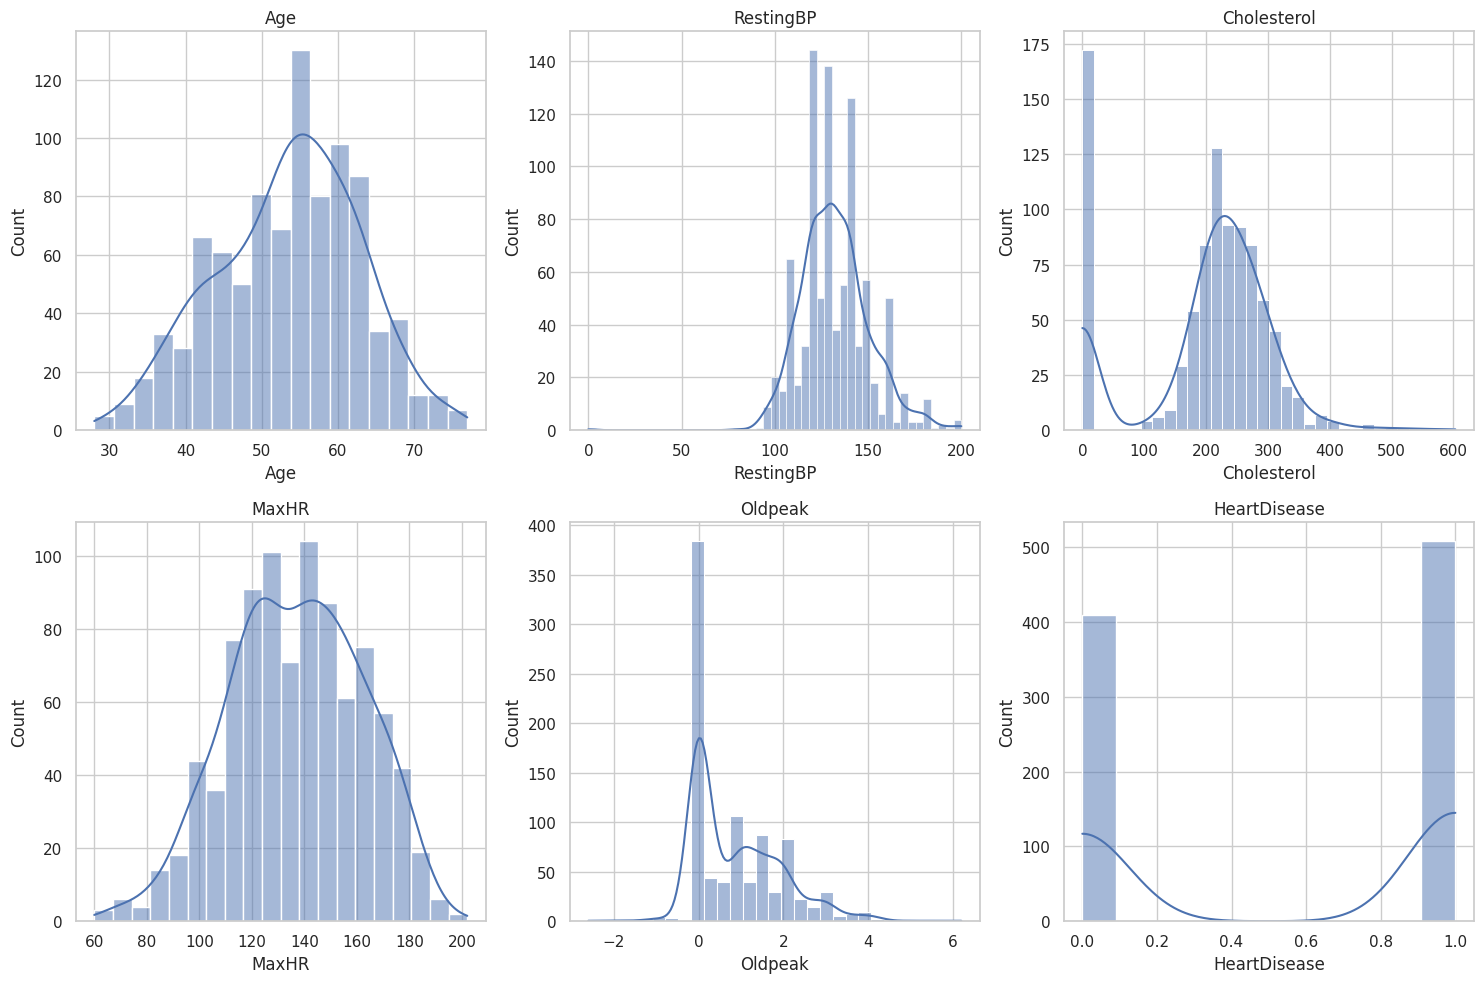

In [13]:
numeric_variables = df_eda.select_dtypes(include=[np.number]).columns

for idx, col in enumerate(numeric_variables,1):
    plt.subplot(2,3,idx)
    plt.title(f'{col}')
    sns.histplot(df_eda[col],kde=True)

plt.tight_layout()
plt.plot()
    

In [14]:
df_eda[df_eda['Cholesterol']!= 0].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


Ahora hagamos un análisis, de las variables numéricas, diferenciando aquellas observaciones con Enfermedad del Corazón y aquellas que no

/tmp/ipykernel_843/3106625073.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
/tmp/ipykernel_843/3106625073.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
/tmp/ipykernel_843/3106625073.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
/tmp/ipykernel_843/3106625073.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
/tmp/ipykernel_843/3106625073.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])


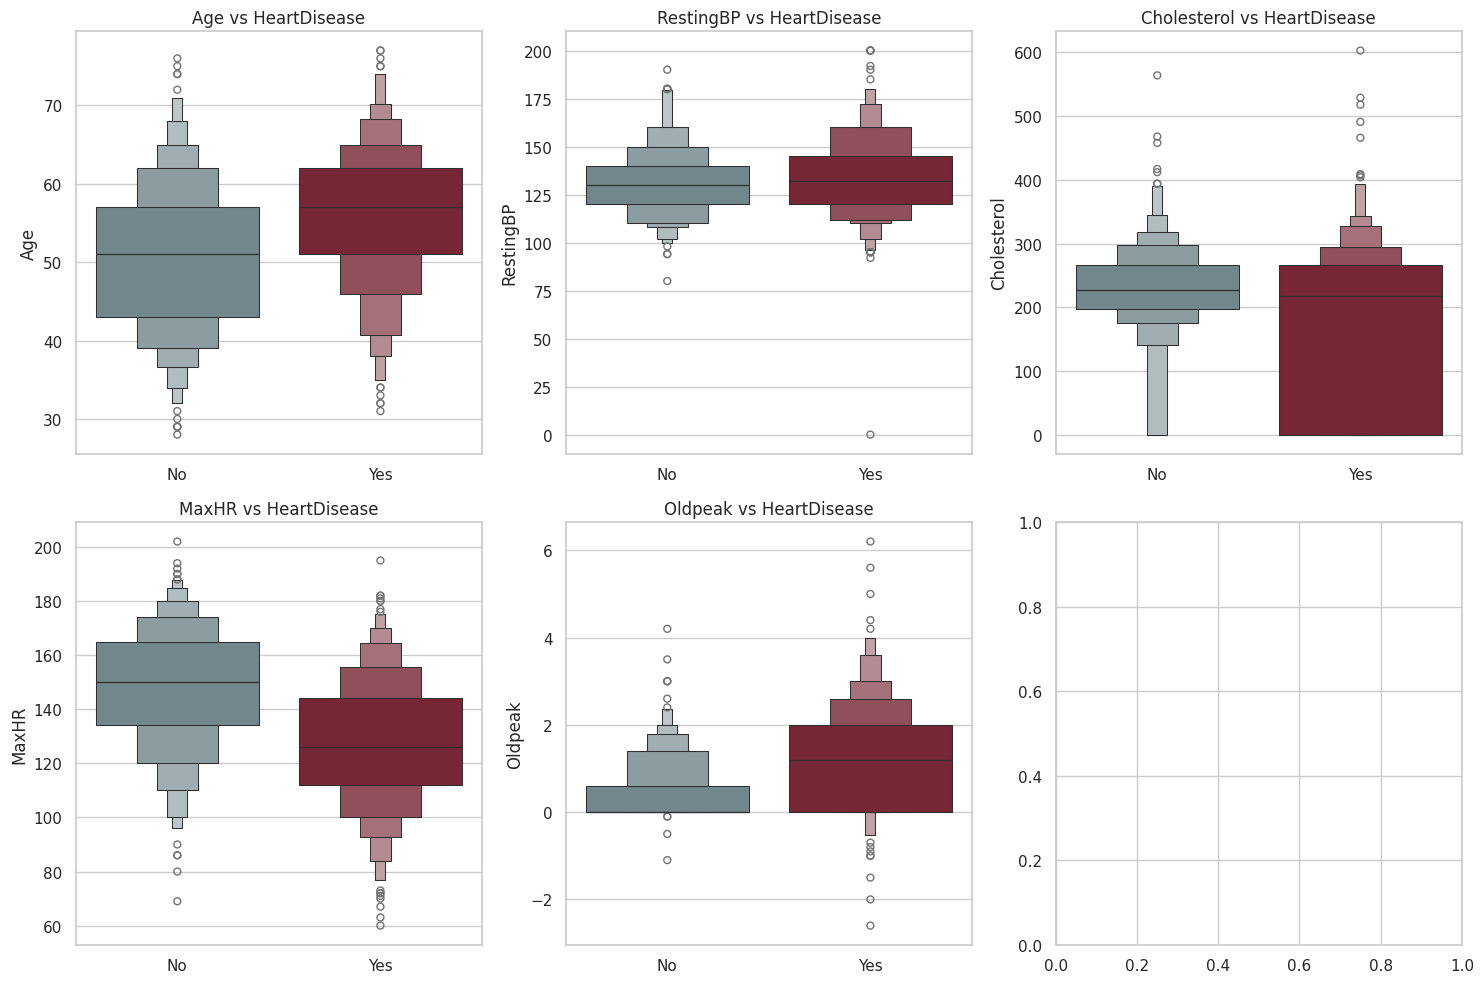

In [15]:
heartAttackPaletteStr = {
    '1' : "#83192D",
    '0' : "#6D8A90"
}
## A continuacion hagamos un boxplot para cada una de las varibales numericas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for ax, var in zip(axes.flatten(), numeric_variables[:-1]):
    sns.boxenplot(x='HeartDisease', y=var, data=df_eda, ax=ax, palette=heartAttackPaletteStr)

    # ax.hlines(df_eda[df_eda['HeartDisease']==1][var].median(), *ax.get_xlim(), color=heartAttackPalette[1], linestyle='--')
    # ax.hlines(df_eda[df_eda['HeartDisease']==0][var].median(), *ax.get_xlim(), color=heartAttackPalette[0], linestyle='--')

    ax.set_title(f'{var} vs HeartDisease')
    ax.set_xlabel('')
    ax.set_xticklabels(['No', 'Yes'])
plt.tight_layout()

#### Análisis variables categóricas
Hagamos un análisis, de las variables categóricas, diferenciando aquellas observaciones con Enfermedad del Corazón y aquellas que no

In [16]:
categorical_variables = df_eda.select_dtypes(include='object').columns

In [17]:

print('Categorical variables for Heart Disease = True\n')
print(df_eda[df_eda['HeartDisease']==1][categorical_variables].describe())
print('\n------------------------------------------------------------------------\n')

print('Categorical variables for Heart Disease = False\n')
print(df_eda[df_eda['HeartDisease']==0][categorical_variables].describe())

Categorical variables for Heart Disease = True

        Sex ChestPainType  FastingBS RestingECG ExerciseAngina ST_Slope
count   508           508        508        508            508      508
unique    2             4          2          3              2        3
top       M           ASY          0     Normal              Y     Flat
freq    458           392        338        285            316      381

------------------------------------------------------------------------

Categorical variables for Heart Disease = False

        Sex ChestPainType  FastingBS RestingECG ExerciseAngina ST_Slope
count   410           410        410        410            410      410
unique    2             4          2          3              2        3
top       M           ATA          0     Normal              N       Up
freq    267           149        366        267            355      317


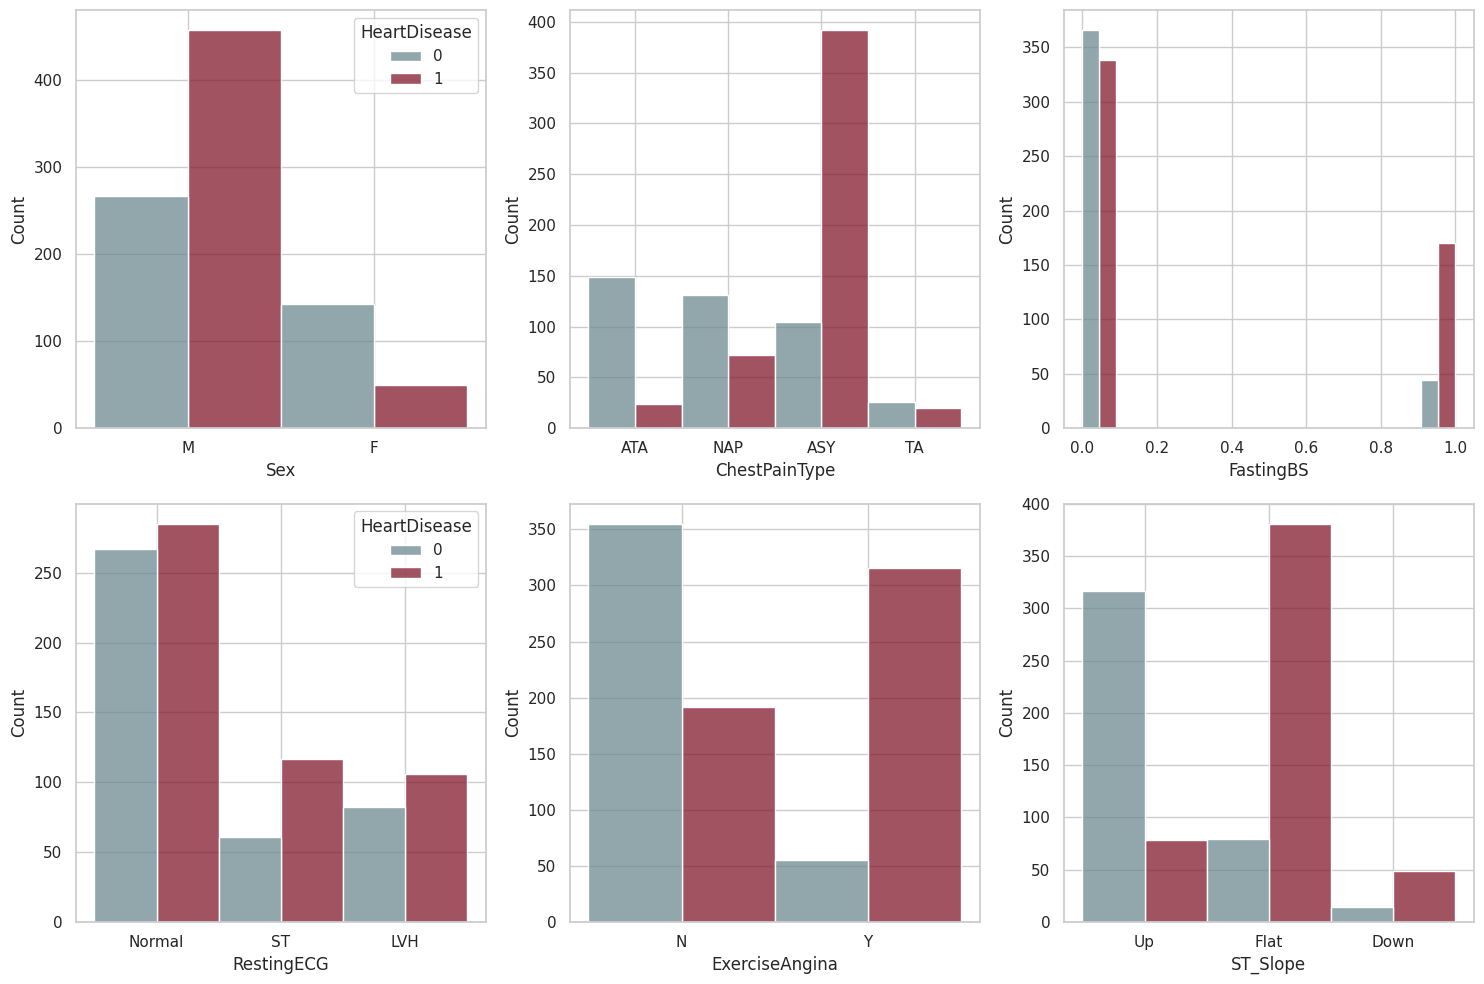

In [18]:
## A continuacion hagamos un countplot para cada una de las varibales categoricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, var in zip(axes.flatten(), categorical_variables):
    sns.histplot(x=var, data=df_eda, palette=heartAttackPalette, hue='HeartDisease', ax=ax, multiple='dodge')


# Se eliminan las leyendas de los graficos en linea para reducir la carga cognitiva
indices_to_remove_legend = [1, 2, 4, 5] 
for index in indices_to_remove_legend:
    if index < len(axes.flatten()): 
        axes.flatten()[index].get_legend().remove()


plt.tight_layout()

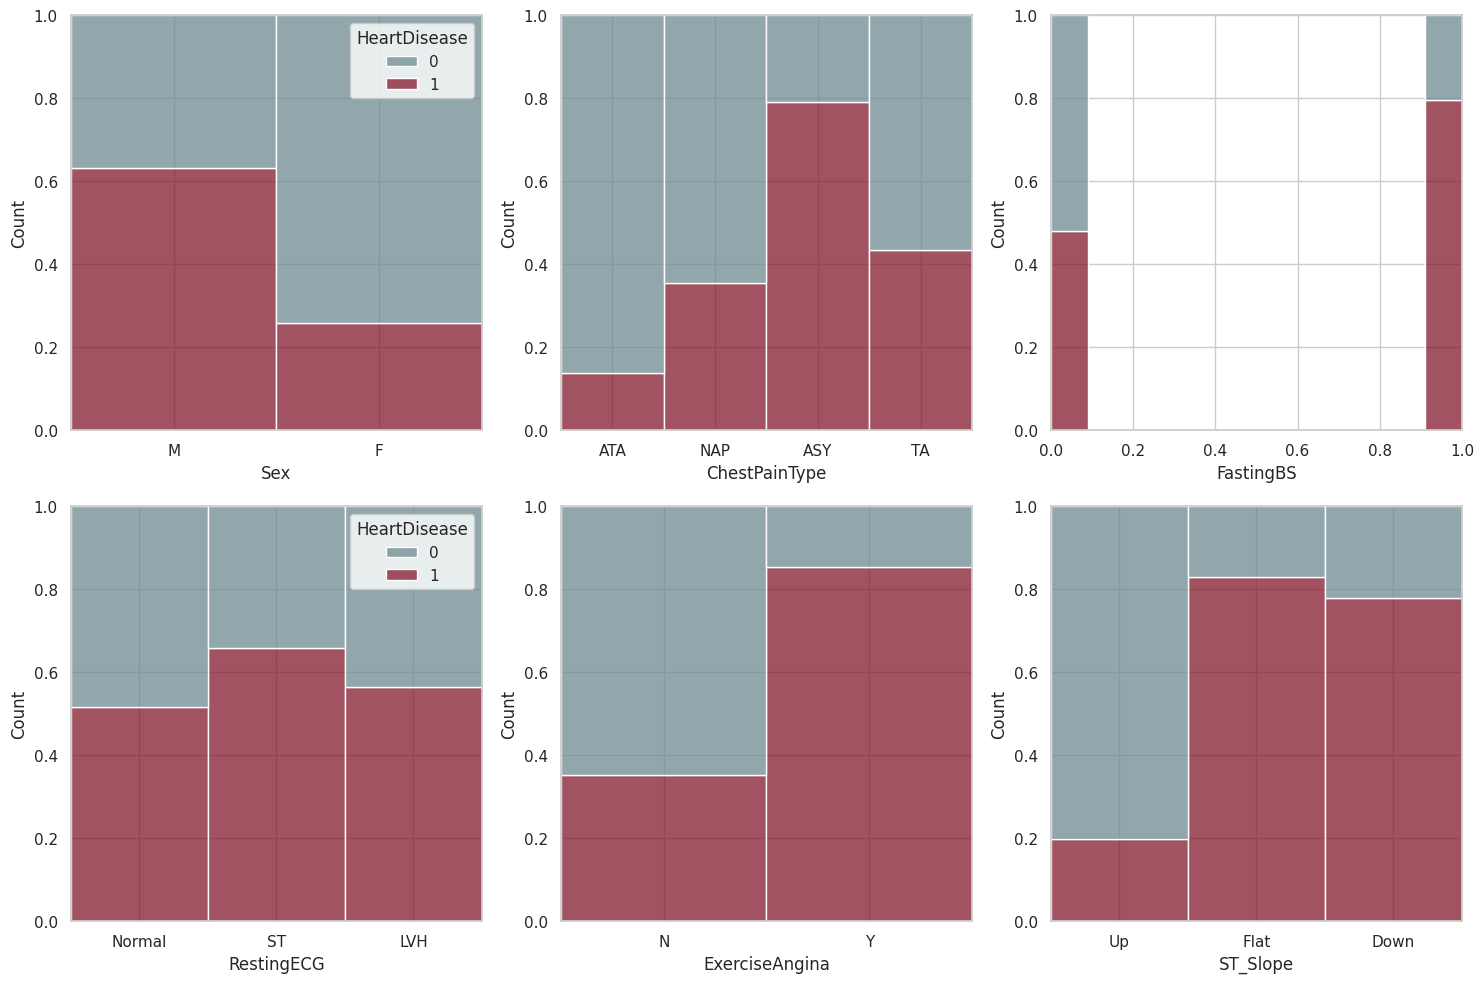

In [19]:
## A continuacion hagamos un Grfico de proporciones para cada una de las varibales categoricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, var in zip(axes.flatten(), categorical_variables):
    sns.histplot(x=var, data=df_eda, palette=heartAttackPalette, hue='HeartDisease', ax=ax, multiple='fill')


# Se eliminan las leyendas de los graficos en linea para reducir la carga cognitiva
indices_to_remove_legend = [1, 2, 4, 5] 
for index in indices_to_remove_legend:
    if index < len(axes.flatten()): 
        axes.flatten()[index].get_legend().remove()


plt.tight_layout()

#### Conclusiones
De las observaciones en la muestra se puede concluir que:
* Las personas de mayor edad son quienes tienen mayor probabilidad de sufir una enfermedad cardiovascular.
* El genero masculino tiene mayor porbabilidad de sufrir una enfermedad cardiovascular que el femenino.
* Se confirma que una gran proporción de los afectados son asintomáticos de dolor.
* Un 80% de quienes sufren de una angina inducida por ejercicio sufren de problemas cardiovaculares.
* Quienes sufren de una enfermedad cardiovascular se tienen un flujo cardiaco máximo mas bajo.

#### Análisis de correlaciones
Para poder llevar a cabo este análisis incluyendo las variables categóricas, en primer lugar se deben transformar dichas variables, en este caso, con un OneHotEnconder

In [20]:
from sklearn.preprocessing import OneHotEncoder

## Se convierten las categorical variables en OneHotEncoding
for var in categorical_variables:
    df_eda = pd.concat([df_eda, pd.get_dummies(df_eda[var], prefix=var)], axis=1)
    df_eda.drop(var, axis=1, inplace=True)

# ## Se crea un OneHotEncoder para cada Variable Categorica
# for var in categorical_variables:
#     onehot_encoder = OneHotEncoder(drop='first', sparse=False)
#     onehot_encoded = onehot_encoder.fit_transform(df_eda[var].values.reshape(-1, 1))

#     column_names = onehot_encoder.get_feature_names_out([f'{var}_'])
#     onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=column_names)
#     df_eda = pd.concat([df_eda, onehot_encoded_df], axis=1)
#     df_eda.drop(var, axis=1, inplace=True)

## Pongamos la columna heartDisease al final
heartDisease = df_eda.pop('HeartDisease')
df_eda['HeartDisease'] = heartDisease


df_eda

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,172,0.0,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,0
1,49,160,180,156,1.0,True,False,False,False,True,...,False,False,True,False,True,False,False,True,False,1
2,37,130,283,98,0.0,False,True,False,True,False,...,False,False,False,True,True,False,False,False,True,0
3,48,138,214,108,1.5,True,False,True,False,False,...,False,False,True,False,False,True,False,True,False,1
4,54,150,195,122,0.0,False,True,False,False,True,...,False,False,True,False,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
914,68,144,193,141,3.4,False,True,True,False,False,...,True,False,True,False,True,False,False,True,False,1
915,57,130,131,115,1.2,False,True,True,False,False,...,False,False,True,False,False,True,False,True,False,1
916,57,130,236,174,0.0,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,1


<AxesSubplot: >

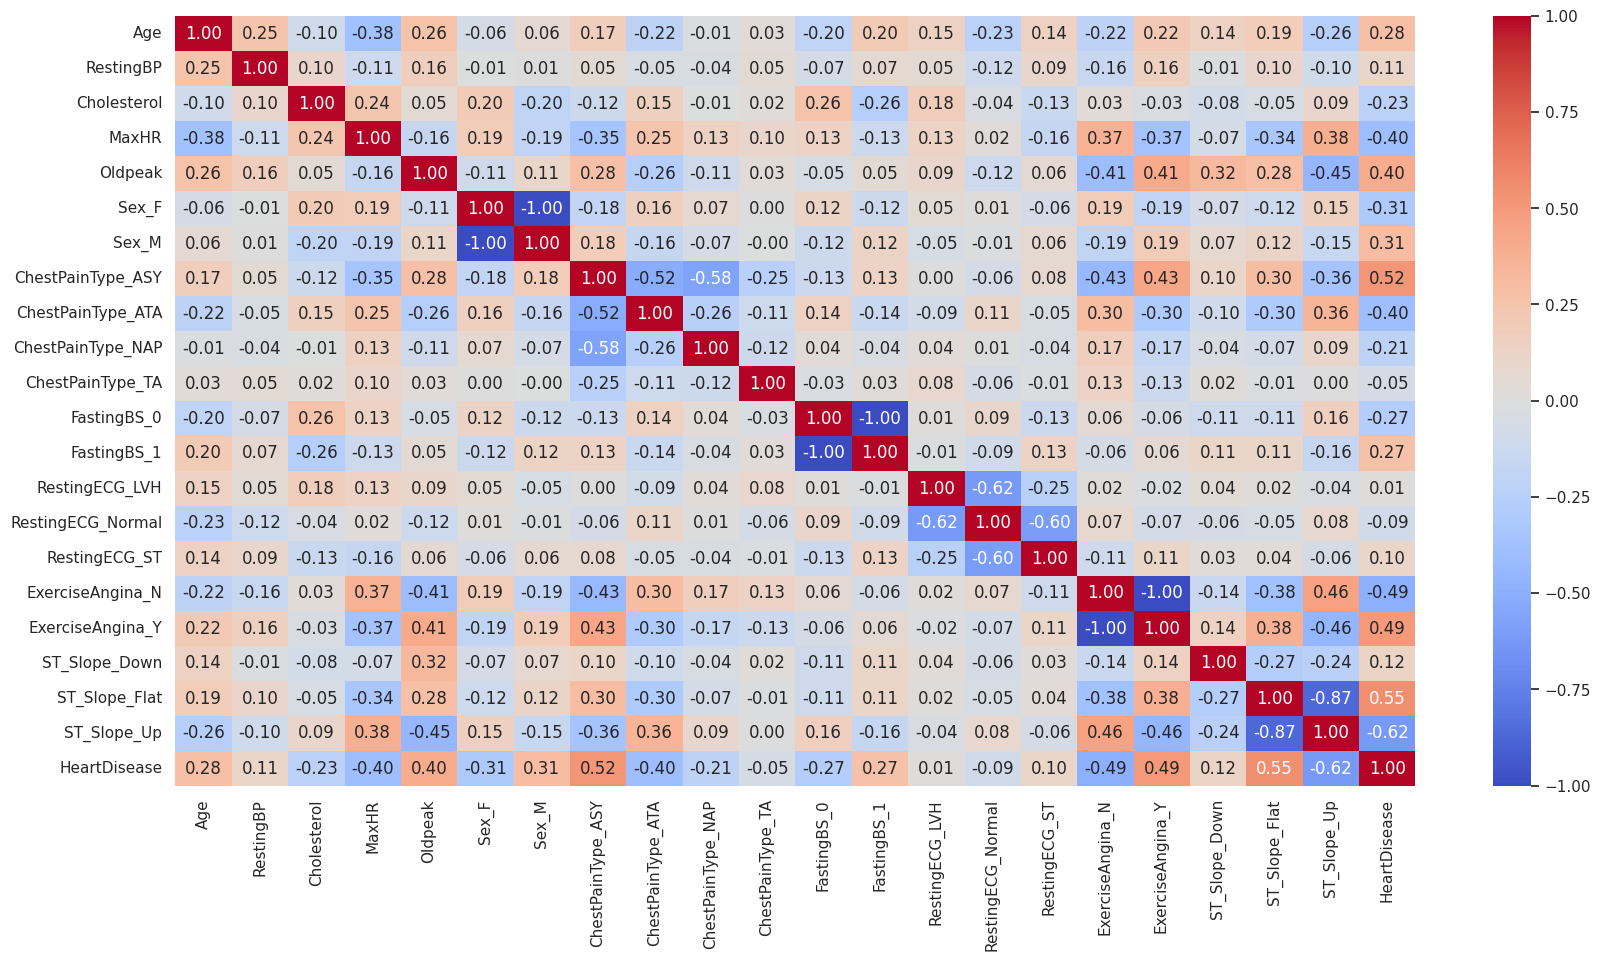

In [21]:
plt.figure(figsize=(20, 10))
# Redondeamos la correlacion a 2 decimales
sns.heatmap(df_eda.corr(), annot=True, cmap='coolwarm', fmt=".2f" )

Notemos que en el dataset transformado, existen variables con una correlación muy alta, algunas incluso con correlación completa,lo que puede resular en un problema para los modelos de Machine Learning, ya que puede haber multicolinealidad. Por lo que se procederá a eliminar las siguientes variables :
- sex_F
- FastingBS_0
- ExerciseAngina_N

No se eliminaran algunas de las variables altamente correlacionadas, ya que estas pueden ser significativas para el modelo y su interpretabilidad.


In [22]:
variables_to_remove = ['Sex_F', 'FastingBS_0', 'ExerciseAngina_N']
df_eda.drop(variables_to_remove, axis=1, inplace=True)
## solo diagonal superior con el parametro mask 

---

<AxesSubplot: >

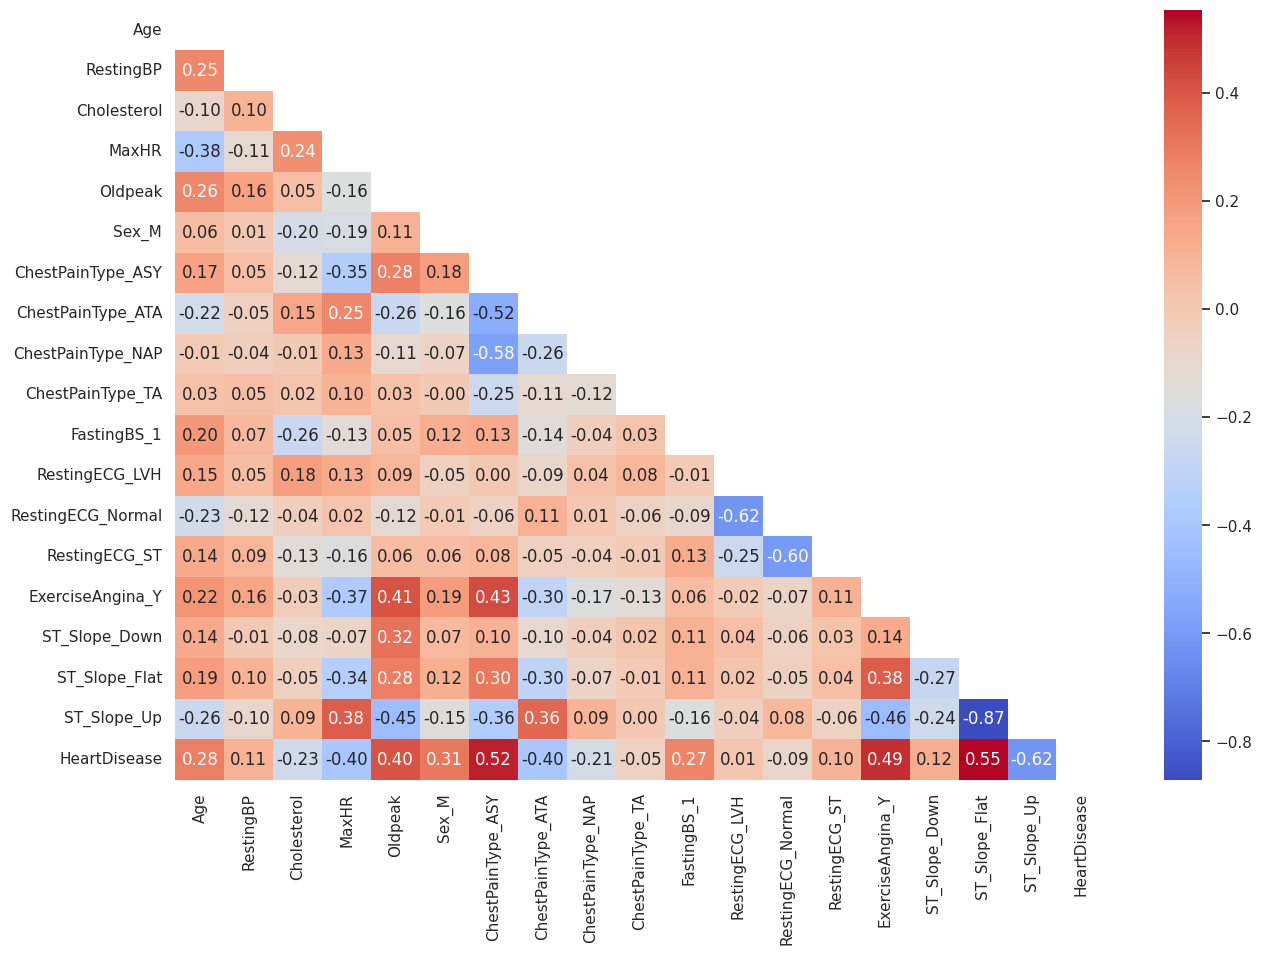

In [23]:

sns.heatmap(df_eda.corr(), annot=True, cmap='coolwarm', fmt=".2f", mask=np.triu(df_eda.corr()))

El análisis de correlaciones parece indicar que:
* El tipo de dolor de pecho.
* La Angina inducida por ejercicio.
* El Ritmo cardiaco máximo
* Cual fue el ultimo pico del electrocardiograma.
* Y la pendiente del segmento en el electrocardiograma.
Parecen ser las variables mas correlacionadas con la presencia de enfermedades cardiovasculares

### Verificación de nulos
Se verifica, por medio de una matriz de nulidad, la ausencia de nulos en el dataset

<AxesSubplot: >

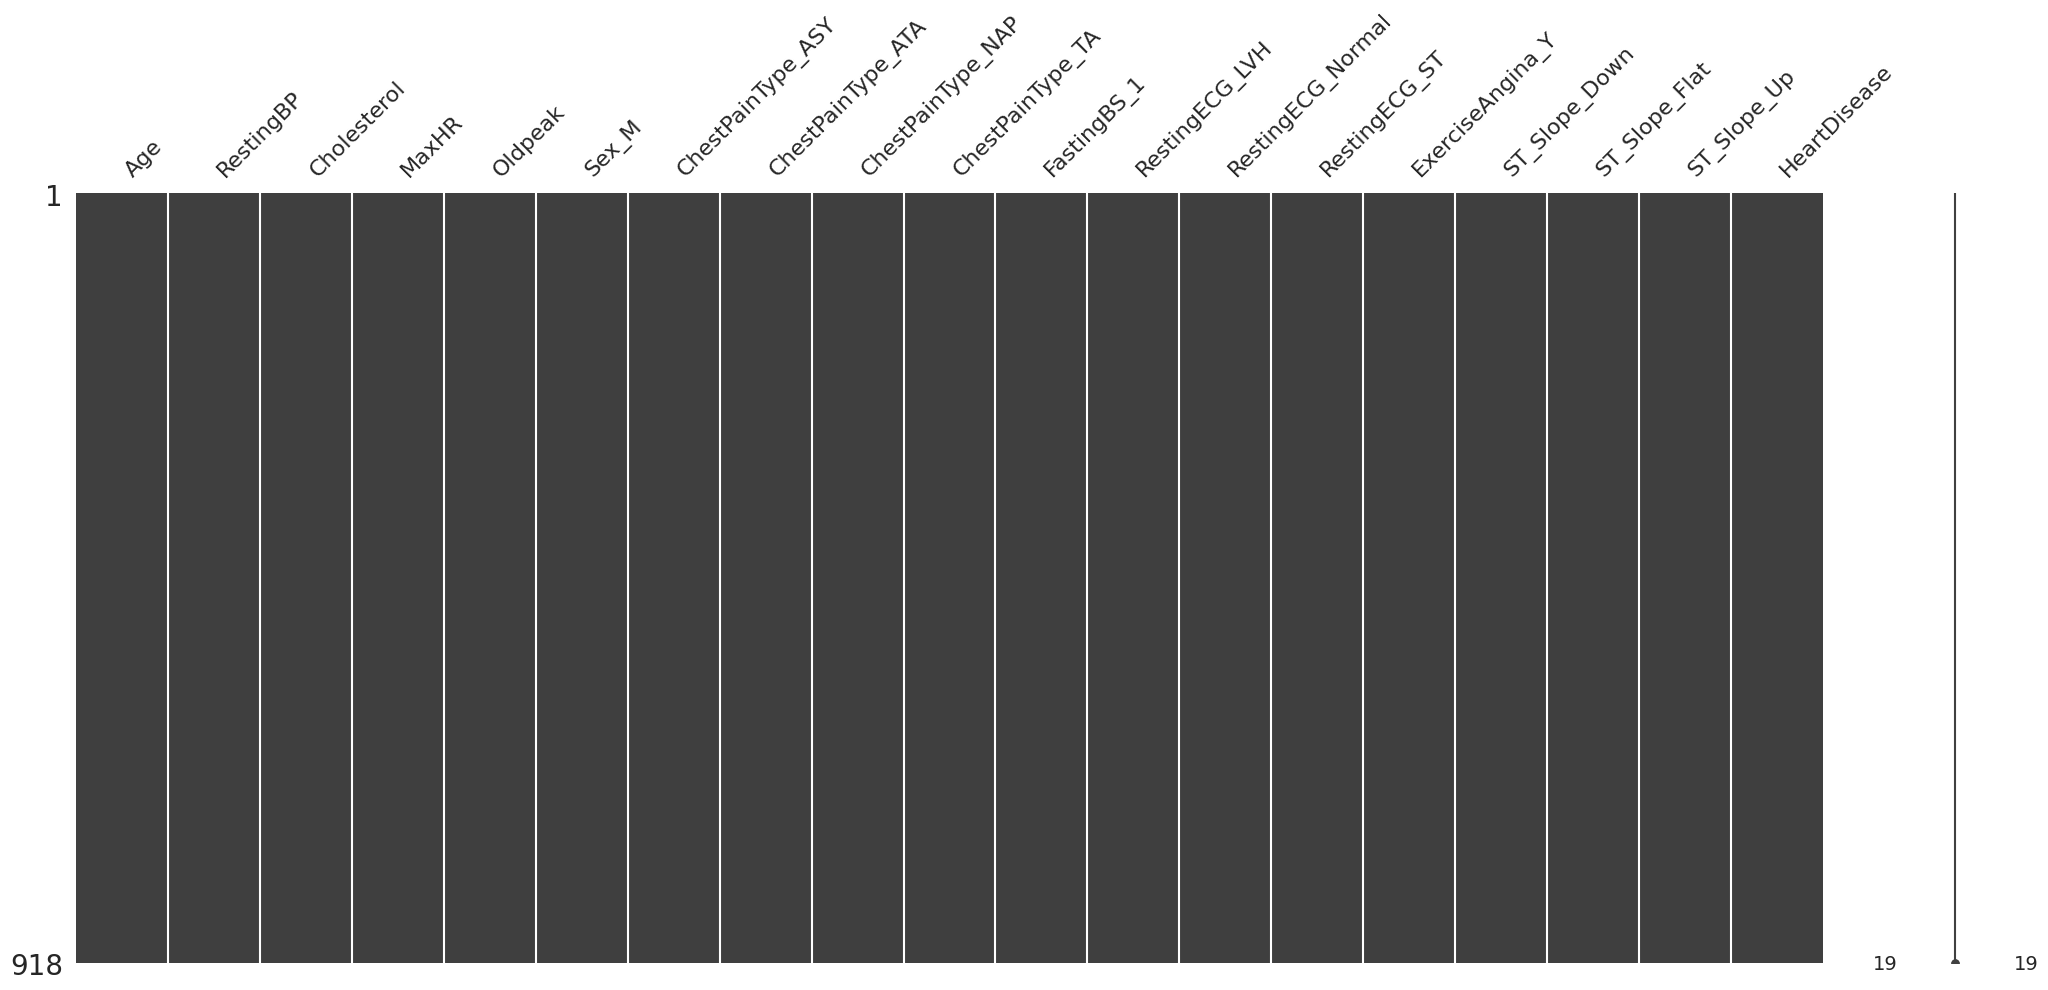

In [24]:
missingno.matrix(df_eda)

## Construcción de modelos

#### Balanceo y escalamiento

In [25]:
df_to_model = df_eda

df_to_model.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Observemos que nuestro conjunto de datos está levemente desbalanceado respecto a la variable objetivo ('HeartDisease'), esto puede llevar a nuestros modelos a sesgos, por lo que se procede a balancear los datos con la técnica SMOTE

In [26]:
X, y = df_to_model.drop('HeartDisease', axis = 1) , df_to_model.HeartDisease

In [27]:
!pip install imbalanced-learn scikit-learn

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [28]:
smote = SMOTE(random_state = 21)
X_res, y_res = smote.fit_resample(X, y)

print('Distribución de clases después de SMOTE:', Counter(y_res))


Distribución de clases después de SMOTE: Counter({0: 508, 1: 508})


In [29]:
scaler = StandardScaler()

XTrainSmote, XTestSmote, yTrainSmote, yTestSmote = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

XTrainSmoteScaled = scaler.fit_transform(XTrainSmote) 
XTestSmoteScaled = scaler.fit_transform(XTestSmote)

### Clasificacion con Regresion Logística
A continuación, se construyen los modelos de clasificación utilizando la Regresión Logística. y posteriormente, se optimizan los parametros buscando mejorar el rendimiento del modelo.

#### Modelo 1
Para el primer modelo se utilizan los parámetros por defecto de la regresión logística y se entrena con todos los datos

In [30]:
basic_lr = LogisticRegression()

basic_lr.fit(XTrainSmote, yTrainSmote)

y_train_pred_model1 = basic_lr.predict(XTrainSmote)
y_test_pred_model1 = basic_lr.predict(XTestSmote)


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Reportes de clasificación
Métricas del modelo para los datos de entrenamiento y de prueba

In [31]:
print(classification_report(yTrainSmote, y_train_pred_model1))
print(classification_report(yTestSmote, y_test_pred_model1))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       420
           1       0.85      0.88      0.87       392

    accuracy                           0.87       812
   macro avg       0.87      0.87      0.87       812
weighted avg       0.87      0.87      0.87       812

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        88
           1       0.88      0.87      0.87       116

    accuracy                           0.86       204
   macro avg       0.85      0.86      0.86       204
weighted avg       0.86      0.86      0.86       204



##### Matriz de confusión
Matriz que nos permite, no solo ver la tasa de aciertos, si no también identificar qué tipo de errores está cometiendo el modelo

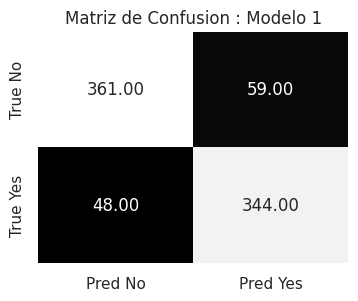

In [32]:
plt.figure(figsize=(4,3))
cm = confusion_matrix(yTrainSmote, y_train_pred_model1)
plt.title('Matriz de Confusion : Modelo 1')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='gray',  cbar=0, xticklabels=['Pred No', 'Pred Yes'], yticklabels=['True No', 'True Yes'])
plt.show();

##### Importancia de las variables en el modelo
Este gráfico nos permite visualizar qué variables son las que el entrenamiento consideró como relevantes para las clasificación 

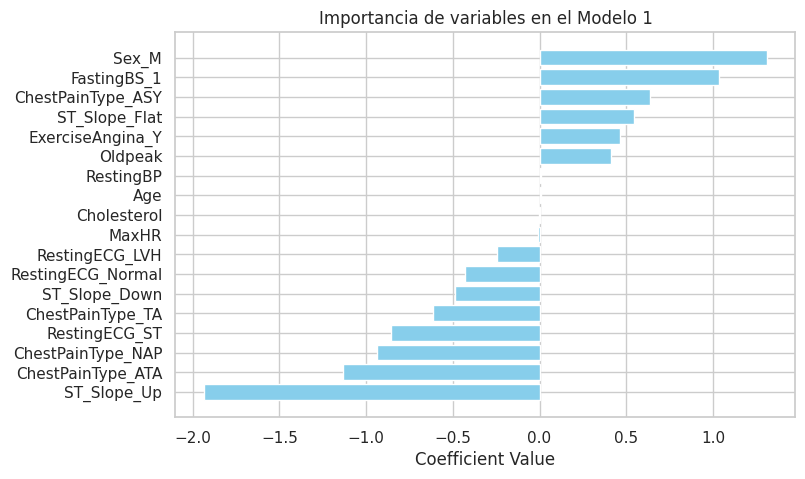

In [33]:
# Extraer los coeficientes del modelo
coef = basic_lr.coef_[0] 

# DataFrame para visualizar mejor los coeficientes
feature_importance = pd.DataFrame({
    'Feature': XTrainSmote.columns,
    'Coefficient': coef
})


feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

# Se grafica la importancia de los coeficientes en orden descendente
plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Importancia de variables en el Modelo 1')
plt.gca().invert_yaxis()
plt.show()

Notemos que tomando todas las variables con las que realizamos el analisis exploratorio, y entrenando el modelo con sus parametros por defecto obtenemos los siguientes resultados.

| Recall  |Datos| 
|---------|--------|
| **87 %**   |Datos de entrenamiento      |
| **86 %**   |    Datos de prueba      |


**Nota:** se toma como métrica de evaluación el Recall debido a que la que minimiza la cantidad de falsos negativos, y este debe ser nuestro principal objetivo al tratarse de un entorno médico 

#### Modelo 2 - Seleccion manual de variables
Para el segundo modelo se utilizan los parámetros por defecto de la regresión logística y se entrena con algunas de las variables mas significativas según la matriz de correlación lineal de pearson.

In [34]:
basic_lr_model2 = LogisticRegression(max_iter = 1000)
most_significant_columns = ['Age' ,'Oldpeak', 'Sex_M', 'ChestPainType_ASY', 'FastingBS_1', 'MaxHR', 'ExerciseAngina_Y']

XTrainSmote2 = XTrainSmote[most_significant_columns]
XTestSmote2 = XTestSmote[most_significant_columns]

basic_lr_model2.fit(XTrainSmote2, yTrainSmote)

y_train_pred_model2 = basic_lr_model2.predict(XTrainSmote2)
y_test_pred_model2 = basic_lr_model2.predict(XTestSmote2)

##### Reportes de clasificación
Métricas del modelo para los datos de entrenamiento y de prueba

In [35]:
print(classification_report(yTrainSmote, y_train_pred_model2))
print(classification_report(yTestSmote, y_test_pred_model2))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       420
           1       0.80      0.78      0.79       392

    accuracy                           0.80       812
   macro avg       0.80      0.80      0.80       812
weighted avg       0.80      0.80      0.80       812

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        88
           1       0.87      0.83      0.85       116

    accuracy                           0.83       204
   macro avg       0.83      0.83      0.83       204
weighted avg       0.84      0.83      0.83       204



##### Matriz de confusión
Matriz que nos permite, no solo ver la tasa de aciertos, si no también identificar qué tipo de errores está cometiendo el modelo

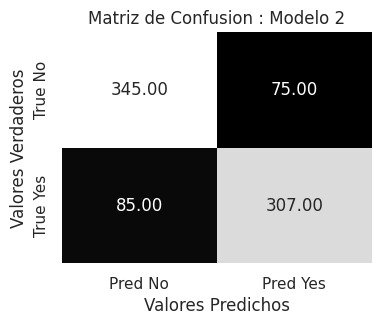

In [36]:
plt.figure(figsize=(4,3))
cm = confusion_matrix(yTrainSmote, y_train_pred_model2)
plt.title('Matriz de Confusion : Modelo 2')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='gray', cbar=0, xticklabels=['Pred No', 'Pred Yes'], yticklabels=['True No', 'True Yes'])

# Añadir etiquetas a los ejes
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.show()

##### Importancia de las variables en el modelo
Este gráfico nos permite visualizar qué variables son las que el entrenamiento consideró como relevantes para las clasificación 

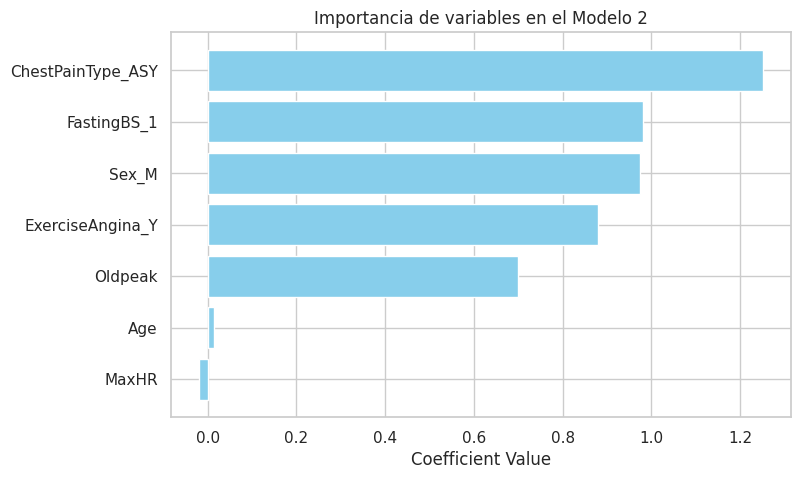

In [37]:
# Extraer los coeficientes del modelo
coef = basic_lr_model2.coef_[0] 

# DataFrame para visualizar mejor los coeficientes
feature_importance = pd.DataFrame({
    'Feature': most_significant_columns,
    'Coefficient': coef
})


feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

# Se grafica la importancia de los coeficientes en orden descendente

plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Importancia de variables en el Modelo 2')
plt.gca().invert_yaxis()
plt.show()


Notemos que tomando unicamente 7 variables, de 18, y entrenando el modelo con sus parametros por defecto obtenemos los siguientes resultados.

| Recall  |Datos| 
|---------|--------|
| **80 %**   |Datos de entrenamiento      |
| **83 %**   |    Datos de prueba      |

Esta es una disminución en los aciertos de las predicciones, sin embargo, teniendo en cuenta que el modelo solo requiere de 7 variables para tener como mínimo un 80% de recall, este podría ser un modelo útil para entornos donde la completitud de la información y la toma de algunas variables sea un inconviente.

#### Modelo 3  - Optimización de parametros
Para el tercer y último modelo se utiliza el método de optimización de GridSearch, para iterar por las combinaciones de los parametros dados y se entrena con todas las variables del dataset original.

In [38]:
from sklearn.model_selection import GridSearchCV

# Se define la grilla en la que se va a iterar el modelo
param_grid = {
    'penalty': ['l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['lbfgs'],
    'max_iter': [100, 500, 1000] 
}

## Se importa el modulo de warnings para evitar llenar el output de dichos anuncios por limite
## de iteraciones alcanzado

import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='recall', verbose=1, n_jobs=-1)
    grid_search.fit(XTrainSmote, yTrainSmote)

    print("Mejor puntuación: ", grid_search.best_score_)
    print("Mejores parámetros: ", grid_search.best_params_)

y_train_pred_model3 = grid_search.predict(XTrainSmote)
y_test_pred_model3 = grid_search.predict(XTestSmote)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Mejor puntuación:  0.8955858487504056
Mejores parámetros:  {'C': 1000.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


##### Reportes de clasificación
Métricas del modelo para los datos de entrenamiento y de prueba

In [39]:
# Reporte de clasificación
print(classification_report(yTrainSmote, y_train_pred_model3))
print(classification_report(yTestSmote, y_test_pred_model3))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       420
           1       0.87      0.89      0.88       392

    accuracy                           0.88       812
   macro avg       0.88      0.88      0.88       812
weighted avg       0.88      0.88      0.88       812

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        88
           1       0.88      0.88      0.88       116

    accuracy                           0.86       204
   macro avg       0.86      0.86      0.86       204
weighted avg       0.86      0.86      0.86       204



##### Matriz de confusión
Matriz que nos permite, no solo ver la tasa de aciertos, si no también identificar qué tipo de errores está cometiendo el modelo

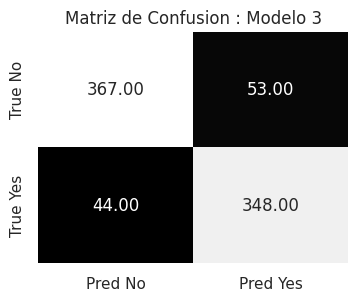

In [40]:
plt.figure(figsize=(4,3))
cm = confusion_matrix(yTrainSmote, y_train_pred_model3)
plt.title('Matriz de Confusion : Modelo 3')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='gray', cbar=0, xticklabels=['Pred No', 'Pred Yes'], yticklabels=['True No', 'True Yes'])
plt.show()

##### Importancia de las variables en el modelo
Este gráfico nos permite visualizar qué variables son las que el entrenamiento consideró como relevantes para las clasificación 

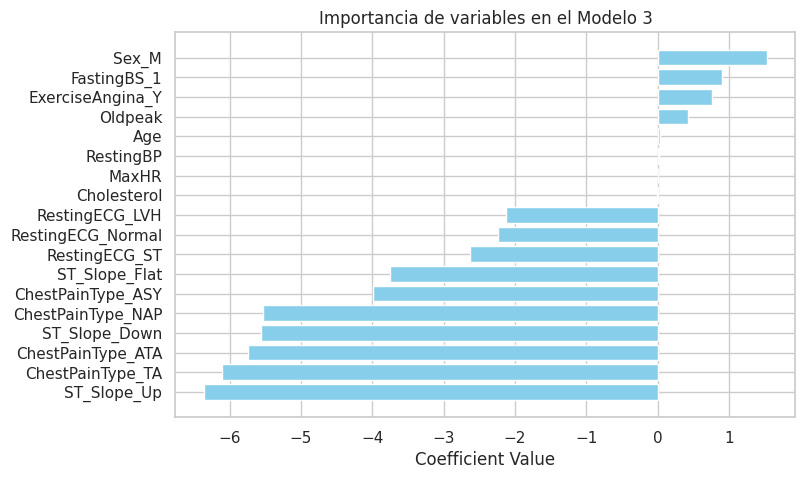

In [41]:
# Extraer los coeficientes del modelo
coef = grid_search.best_estimator_.coef_[0]

# DataFrame para visualizar mejor los coeficientes
feature_importance = pd.DataFrame({
    'Feature': XTrainSmote.columns,
    'Coefficient': coef
})


feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

# Se grafica la importancia de los coeficientes en orden descendente

plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Importancia de variables en el Modelo 3')
plt.gca().invert_yaxis()
plt.show()

Finalmente, para el último modelo, por medio de la optimización paramétrica por medio de la busqueda por cuadrícula obtenemos los siguientes resultados:
| Recall  |Datos| 
|---------|--------|
| **88 %**   |Datos de entrenamiento      |
| **86 %**   |    Datos de prueba      |

Esto es un incremento en los aciertos de las predicciones, inclusive respecto al modelo 1, por lo que se toma este modelo como el que resultó mejor respecto a la métrica tomada.

Este podría ser un modelo útil para entornos donde se tiene acceso a todas las variables, e incluso se podría tomar como base para realizar estudios acerca de la influencia de la variables que el modelo considera mas importantes en la clasificación de pacientes con enfermedades cardiovasculares.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=831d084f-9084-4915-86f4-43a082d05c5e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>